## Best and Worst Businesses

#### Data loading (153 MB)

In [121]:
import pandas as pd

# read the entire file into a python array
with open('../yelp_dataset/yelp_academic_dataset_business.json', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"

# now, load it into pandas
df = pd.read_json(data_json_str)
print("business.json contains %i records, each composed by %i columns." % (df.shape[0], df.shape[1]))

business.json contains 209393 records, each composed by 14 columns.


#### Best rated and worst rated

In [122]:
from IPython.display import display, Markdown

best_rated = df.sort_values(by=['stars', 'review_count'], ascending=False).head(100)
worst_rated = df.sort_values(by=['stars', 'review_count'], ascending=(True, False)).head(100)

display(Markdown("#### Best Rated"))
i = 1
for index, row in best_rated.head(10).iterrows():
    to_print = ("%i. **%s**, %s, %s (id: %i) with _%i_ stars over *%i* reviews."
          % (i, row['name'], 
             row['address'] if row['address'] != "" else "unknown", 
             row['city'], index, row['stars'], row['review_count']))
    display(Markdown(to_print))
    i = i + 1

display(Markdown("#### Worst Rated"))
i = 1
for index, row in worst_rated.head(10).iterrows():
    to_print = ("%i. **%s**, %s, %s (id: %i) with _%i_ stars over *%i* reviews."
          % (i, row['name'], 
             row['address'] if row['address'] != "" else "unknown", 
             row['city'], index, row['stars'], row['review_count']))
    display(Markdown(to_print))
    i = i + 1

#### Best Rated

1. **Little Miss BBQ**, 4301 E University Dr, Phoenix (id: 141155) with _5_ stars over *2329* reviews.

2. **Brew Tea Bar**, 7380 S Rainbow Blvd, Ste 101, Las Vegas (id: 12657) with _5_ stars over *1827* reviews.

3. **Cocina Madrigal**, 4044 S 16th St, Phoenix (id: 159659) with _5_ stars over *1107* reviews.

4. **Paranormal - Mind Reading Magic Show**, 3645 Las Vegas Blvd S, Las Vegas (id: 92710) with _5_ stars over *979* reviews.

5. **Green Corner Restaurant**, 1038 W Southern Ave, Ste 1, Mesa (id: 166188) with _5_ stars over *858* reviews.

6. **Eco-Tint**, 4510 W Diablo Dr, Ste A102, Las Vegas (id: 77614) with _5_ stars over *853* reviews.

7. **Worth Takeaway**, 218 W Main St, Mesa (id: 16954) with _5_ stars over *842* reviews.

8. **Zenaida's Cafe**, 3430 E Tropicana Ave, Ste 32, Las Vegas (id: 46767) with _5_ stars over *717* reviews.

9. **Kodo Sushi Sake**, 15040 N Northsight Blvd, Ste 104, Scottsdale (id: 162610) with _5_ stars over *695* reviews.

10. **Carpet Monkeys**, unknown, Las Vegas (id: 69159) with _5_ stars over *688* reviews.

#### Worst Rated

1. **Cox Communications**, unknown, Phoenix (id: 175659) with _1_ stars over *1008* reviews.

2. **Cox Communications**, unknown, Tempe (id: 95518) with _1_ stars over *438* reviews.

3. **DIRECTV**, unknown, Phoenix (id: 54146) with _1_ stars over *329* reviews.

4. **Phoenix Car Rental**, 2934 E McDowell Rd, Phoenix (id: 40343) with _1_ stars over *229* reviews.

5. **Bank of America Store and Heritage Center**, 100 N Tryon St, Ste 115, Charlotte (id: 115078) with _1_ stars over *221* reviews.

6. **CenturyLink**, 1000 Centurylink Dr, Phoenix (id: 42708) with _1_ stars over *213* reviews.

7. **CenturyLink Store**, 2101 N Rainbow Blvd, Ste 100, Las Vegas (id: 147975) with _1_ stars over *207* reviews.

8. **Teleflora Fresh Flowers**, unknown, Las Vegas (id: 111619) with _1_ stars over *193* reviews.

9. **E-Z Rent-A-Car**, 6465 Airport Road, Unit 1, Mississauga (id: 67906) with _1_ stars over *185* reviews.

10. **Economy Rent a Car**, 3356 Elmbank Road, Mississauga (id: 140522) with _1_ stars over *171* reviews.

#### Cities with best rated businesses

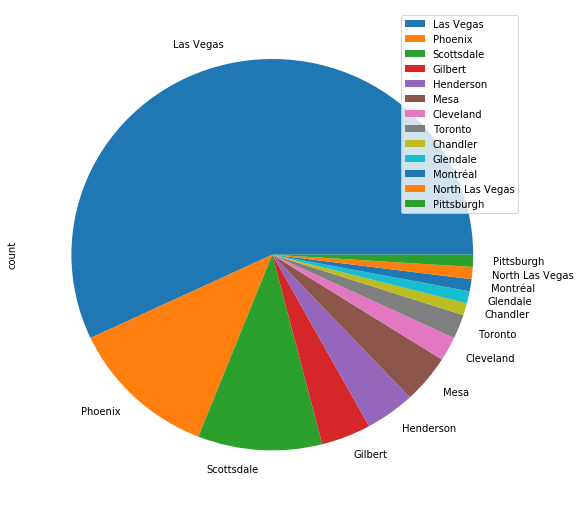

In [82]:
best_cities = best_rated.groupby(['city', 'state']).size().reset_index(name='count')
best_cities = best_cities.sort_values(by=['count'], ascending=False)
best_cities = best_cities.set_index('city')
best_cities.plot.pie(x='city', y='count', figsize=(9,9))

#### Cities with worst rated businesses

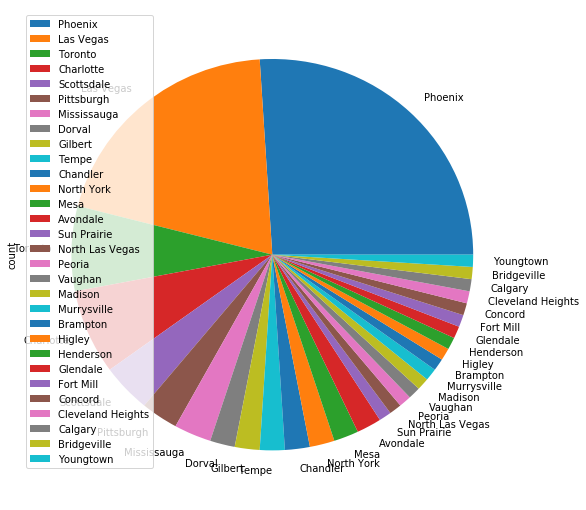

In [85]:
worst_cities = worst_rated.groupby(['city', 'state']).size().reset_index(name='count')
worst_cities = worst_cities.sort_values(by=['count'], ascending=False)
worst_cities = worst_cities.set_index('city')
worst_cities.plot.pie(x='city', y='count', figsize=(9,9))

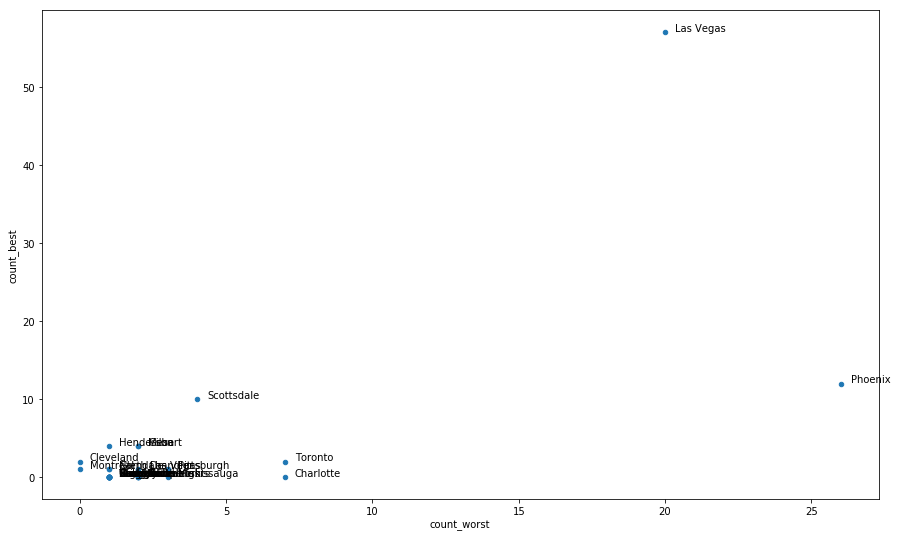

In [119]:
import matplotlib.pyplot as plt

df = pd.merge(best_cities, worst_cities, on=['city', 'state'], how='outer', suffixes=('_best', '_worst')).fillna(0)

fig, ax = plt.subplots()
df.plot.scatter(x='count_worst', y='count_best', ax=ax, figsize=(15,9))

for i in range(df.shape[0]):
    plt.annotate(df.index.tolist()[i], (df.count_worst.tolist()[i], df.count_best.tolist()[i]),
                xytext=(10, 0.95), textcoords="offset points")